<a href="https://colab.research.google.com/github/karanpdx/UW-PHYS417/blob/main/EuroSATClassification_%2B_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/EuroSAT.zip -d /content/extracted_files/

Streaming output truncated to the last 5000 lines.
  inflating: /content/extracted_files/allBands/River/River_1990.tif  
  inflating: /content/extracted_files/allBands/River/River_1991.tif  
  inflating: /content/extracted_files/allBands/River/River_1992.tif  
  inflating: /content/extracted_files/allBands/River/River_1993.tif  
  inflating: /content/extracted_files/allBands/River/River_1994.tif  
  inflating: /content/extracted_files/allBands/River/River_1995.tif  
  inflating: /content/extracted_files/allBands/River/River_1996.tif  
  inflating: /content/extracted_files/allBands/River/River_1997.tif  
  inflating: /content/extracted_files/allBands/River/River_1998.tif  
  inflating: /content/extracted_files/allBands/River/River_1999.tif  
  inflating: /content/extracted_files/allBands/River/River_2.tif  
  inflating: /content/extracted_files/allBands/River/River_20.tif  
  inflating: /content/extracted_files/allBands/River/River_200.tif  
  inflating: /content/extracted_files/allBand

In [3]:
import shutil # shutil - tool that works with files and directories , used to get rid of "allBands" directory
import os


# Path to the "allBands" directory
allbands_dir = os.path.join("/content/extracted_files/", "allBands")

# Check if the directory exists and is a directory
if os.path.exists(allbands_dir) and os.path.isdir(allbands_dir):
    try:
        shutil.rmtree(allbands_dir)  # Delete the directory and its contents
        print(f"Directory '{allbands_dir}' and its contents deleted successfully.") # allBands gave us files from a different satellite which had .tif files, all bands of the spectrum
    except OSError as e:
        print(f"Error: %s - %s." % (e.filename, e.strerror))
else:
    print(f"Directory '{allbands_dir}' not found after extraction.") # Ensure that it was deleted

Directory '/content/extracted_files/allBands' and its contents deleted successfully.


In [4]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader # Helps load and batch data during training + evaluation

# Define a transform to normalize and resize images
transform = transforms.Compose([ # Transform function onto images of dataset, 'Compose' combines multiple transformations into one
    transforms.Resize((64, 64)), # Resize image to 64 by 64 pixels to ensure same size
    transforms.ToTensor(), # Convert image into tensor
])

# Path where the data is stored (you can download manually from https://github.com/phelber/EuroSAT)
data_dir = "/content/extracted_files/"

# Load dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Create DataLoader
data_loader = DataLoader(dataset, batch_size=32, shuffle=True) # Loads in batches of 32 images, shuffles data before each epoch

# Example: Check class names
print(dataset.classes)

['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [5]:
import pandas as pd

# Paths to your CSV files
train_csv_path = '/content/extracted_files/train.csv'
val_csv_path = '/content/extracted_files/validation.csv'
test_csv_path = '/content/extracted_files/test.csv'

# Load the CSV files into DataFrames
train_df = pd.read_csv(train_csv_path) # DataFrames are like tables with rows and columns, like a spreadsheet
val_df = pd.read_csv(val_csv_path)
test_df = pd.read_csv(test_csv_path)

# Display the first few rows of the training dataset
print(train_df.head())

   Unnamed: 0                                           Filename  Label  \
0       16257                      AnnualCrop/AnnualCrop_142.jpg      0   
1        3297  HerbaceousVegetation/HerbaceousVegetation_2835...      2   
2       17881               PermanentCrop/PermanentCrop_1073.jpg      6   
3        2223                      Industrial/Industrial_453.jpg      4   
4        4887  HerbaceousVegetation/HerbaceousVegetation_1810...      2   

              ClassName  
0            AnnualCrop  
1  HerbaceousVegetation  
2         PermanentCrop  
3            Industrial  
4  HerbaceousVegetation  


In [6]:
# Extract features (image paths) and labels (numeric labels)
X_train = train_df.iloc[:, 1].values  # Column 1: Image paths
y_train = train_df.iloc[:, 2].values  # Column 2: Numeric labels

X_val = val_df.iloc[:, 1].values # Column 1: Image paths
y_val = val_df.iloc[:, 2].values # Column 2: Numeric labels

X_test = test_df.iloc[:, 1].values # Column 1: Image paths
y_test = test_df.iloc[:, 2].values # Column 2: Numeric labels

# Display a few examples to verify correctness
print("Training features (image paths):", X_train[:5]) # Takes the first 5 image paths
print("Training labels:", y_train[:5]) # Takes the first 5 labels

Training features (image paths): ['AnnualCrop/AnnualCrop_142.jpg'
 'HerbaceousVegetation/HerbaceousVegetation_2835.jpg'
 'PermanentCrop/PermanentCrop_1073.jpg' 'Industrial/Industrial_453.jpg'
 'HerbaceousVegetation/HerbaceousVegetation_1810.jpg']
Training labels: [0 2 6 4 2]


In [7]:
import os

# Define the root directory where images are stored
root_dir = '/content/extracted_files/'

# Combine the root directory with relative paths from CSVs
X_train_full_paths = [os.path.join(root_dir, path) for path in X_train] # Creates a list of image path files
X_val_full_paths = [os.path.join(root_dir, path) for path in X_val] # Creates a list of image path files
X_test_full_paths = [os.path.join(root_dir, path) for path in X_test] # Creates a list of image path files

# Verify a few examples of full paths
print(X_train_full_paths[:5]) # Takes the first 5 image paths

['/content/extracted_files/AnnualCrop/AnnualCrop_142.jpg', '/content/extracted_files/HerbaceousVegetation/HerbaceousVegetation_2835.jpg', '/content/extracted_files/PermanentCrop/PermanentCrop_1073.jpg', '/content/extracted_files/Industrial/Industrial_453.jpg', '/content/extracted_files/HerbaceousVegetation/HerbaceousVegetation_1810.jpg']


In [8]:
from torchvision import transforms
from PIL import Image # Python Imaging Library, or 'Pillow Library', Image allows us to load and manipulate images

# Define transformations for preprocessing images
transform = transforms.Compose([ # Transform function onto images of dataset, 'Compose' combines multiple transformations into one
    transforms.Resize((64, 64)), # Resize images to 64x64 pixels
    transforms.ToTensor(), # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize pixel values
])

In [9]:
from PIL import Image
import torch

def preprocess_images(image_paths): # Function that takes list of image file paths as input
    images = [] # Empty list called images, stores processed image tensors
    for path in image_paths: # For each path in the list of image paths
        try:
            img = Image.open(path).convert("RGB") # Open image and ensure it's RGB
            img_tensor = transform(img) # Apply transformations
            images.append(img_tensor) # Appends processed image tensor to image list
        except FileNotFoundError:
            print(f"File not found: {path}")
    return torch.stack(images) # Stack list of tensors into a single tensor, tensor where each element is a stacked image tensor, new tensor created has an extra dimension that represents the number of images

# Preprocess train, validation, and test images
X_train_tensor = preprocess_images(X_train_full_paths) # Takes the preprocessed images from  above, stores stacked tensor
X_val_tensor = preprocess_images(X_val_full_paths) # Takes the preprocessed images from  above, stores stacked tensor
X_test_tensor = preprocess_images(X_test_full_paths) # Takes the preprocessed images from  above, stores stacked tensor

In [10]:
# Convert label arrays into a tensor with long integers
y_train_tensor = torch.tensor(y_train, dtype=torch.long) # y_train is the array with training labels, converts array into tensor, each element is a long integer
y_val_tensor = torch.tensor(y_val, dtype=torch.long) # y_val is the array with validation labels, converts array into tensor, each element is a long integer
y_test_tensor = torch.tensor(y_test, dtype=torch.long) # y_test is the array with testing labels, converts array into tensor, each element is a long integer
                                                       # A long integer uses more bits to store value, increases range of numbers it can be, ensures enough range

In [11]:
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor) # Creates a tensor dataset combining x_train and y_train
val_dataset = TensorDataset(X_val_tensor, y_val_tensor) # Creates a tensor dataset combining x_val and y_val
test_dataset = TensorDataset(X_test_tensor, y_test_tensor) # Creates a tensor dataset combining x_test and y_test

In [12]:
from torch.utils.data import DataLoader # DataLoader helps load data in batches and shuffles during training

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) # Runs model through training in batches of 32 images, shuffling every epoch
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False) # Runs model through validation in batches of 32 images, does not shuffle
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False) # Runs model through testing in batches of 32 images, does not shuffle

# Example: Iterate through training data
for images, labels in train_loader:
    print(images.shape)  # Batch of images (e.g., [32, 3, 64, 64]) 32 images, 3 channels (RGB), 64 x 64
    print(labels.shape)  # Batch of labels (e.g., [32]) batch of 32 labels
    break

torch.Size([32, 3, 64, 64])
torch.Size([32])


In [13]:
import torch
import torch.nn as nn

class EuroSATCustomCNN(nn.Module): # Convulutional Neural Network
    def __init__(self, num_classes): # 10 classes
        super(EuroSATCustomCNN, self).__init__() # Initializes
        self.conv_layers = nn.Sequential( # Creates a container, used to define a sequence of convolutional layers
            # Convolutional Layer 1
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),  # Input: 3 input channels, 32 output channels (feature maps), 3x3 convultional kernel, stride is the movement of the kernel, padding preserves spatial dimensions
            nn.BatchNorm2d(32),                                   # Normalize activations to the output of the convolutional layer, stabilizes training
            nn.ReLU(),                                            # Activation function, introduces non-linearity and complexity
            nn.MaxPool2d(kernel_size=2, stride=2),                # Applies max pooling, downsamples feature maps (reduces spatial dimensions)

            # Convolutional Layer 2
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), # Increasing amount of inputs and outputs, needs more features to learn
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),                # Downsample: [batch_size, 64, 16, 16]

            # Convolutional Layer 3
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)                 # Downsample: [batch_size, 128, 8, 8]
        )

        self.fc_layers = nn.Sequential( # Creates a container for fully connected layers
            nn.Flatten(),                                         # Flattens output into a 1d tensor, required for fully connected layers
            nn.Linear(128 * 8 * 8, 256),                         # Fully connected layer, (128 * 8 * 8) is the batch size, 256 is the number of input features
            nn.ReLU(),                                           # Converts 1D tensor value to positive or zero, same shape as input
            nn.Dropout(0.5),                                     # Regularization to prevent overfitting, randomly sets some activations to zero
            nn.Linear(256, num_classes)                          # Output layer for classification
        )

    def forward(self, x): # Defines the forward pass of the network
        x = self.conv_layers(x) # Sends input through convolutional layers
        x = self.fc_layers(x) # Sends input through fully connected layers
        return x

# Define the model with the number of classes (EuroSAT has 10 classes)
num_classes = 10
model = EuroSATCustomCNN(num_classes=num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

EuroSATCustomCNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=8192, out_features=256, bias=True)
    (2): ReLU()
    (3

In [14]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss() # Introduces loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Training loop
train_losses = [] # Empty list to store training losses for each epoch
val_losses = [] # Empty list to store validation losses for each epoch

num_epochs = 30 # Number of epochs set to run

for epoch in range(num_epochs): # Starts the training model
    model.train()
    running_loss = 0.0 # Keeps track of the loss as the training is running

    for images, labels in train_loader: # Iterates through the training data in batches
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad() # Resets gradients of model's parameters, PyTorch accumulates gradients by default
        outputs = model(images) # Forward pass, images go through model to get predicted outputs
        loss = criterion(outputs, labels) # Calculates loss between predicted outputs and true labels
                                          # Loss is calculated through softmax (exp(x_i))/(∑_j(exp(x_j))) where x is confidence scores for each class, giving us probabilities that add up to 1
                                          # Each score should have its own value, then take the natural logarithm of the probabilities, giving a negative number
                                          # It then takes the true label represented as an integer, and selects the log probability corresponding to the true label, and calculates the negative of the value
        loss.backward() # Backwards pass, computes gradients of loss in respect to the model parameters
        optimizer.step() # Updates the model parameters using optimizer
        running_loss += loss.item() # Adds batch loss to the running loss

    train_losses.append(running_loss / len(train_loader))  # Average training loss

    model.eval() # Sets model to evaluation mode
    val_running_loss = 0.0 # Keeps track of the loss as the validation is running
    with torch.no_grad(): # Disables gradient
        for images, labels in val_loader: # Iterates through the validation data in batches
            images, labels = images.to(device), labels.to(device)
            outputs = model(images) # Forward pass on validation data
            loss = criterion(outputs, labels) # Calculates validation loss
            val_running_loss += loss.item() # Adds batch loss to the running loss

    val_losses.append(val_running_loss / len(val_loader))  # Average validation loss

    print(f"Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

Epoch 1, Train Loss: 1.2829, Val Loss: 0.8738
Epoch 2, Train Loss: 0.9466, Val Loss: 0.7240
Epoch 3, Train Loss: 0.8245, Val Loss: 0.5993
Epoch 4, Train Loss: 0.7611, Val Loss: 0.5029
Epoch 5, Train Loss: 0.6745, Val Loss: 0.4876
Epoch 6, Train Loss: 0.6333, Val Loss: 0.7322
Epoch 7, Train Loss: 0.5666, Val Loss: 0.5302
Epoch 8, Train Loss: 0.5106, Val Loss: 0.3671
Epoch 9, Train Loss: 0.4868, Val Loss: 0.5626
Epoch 10, Train Loss: 0.4333, Val Loss: 0.5598
Epoch 11, Train Loss: 0.4066, Val Loss: 0.2904
Epoch 12, Train Loss: 0.3557, Val Loss: 0.3558
Epoch 13, Train Loss: 0.3356, Val Loss: 0.2466
Epoch 14, Train Loss: 0.3163, Val Loss: 0.3093
Epoch 15, Train Loss: 0.2966, Val Loss: 0.2132
Epoch 16, Train Loss: 0.2627, Val Loss: 0.2956
Epoch 17, Train Loss: 0.2544, Val Loss: 0.2661
Epoch 18, Train Loss: 0.2429, Val Loss: 0.2956
Epoch 19, Train Loss: 0.2121, Val Loss: 0.1982
Epoch 20, Train Loss: 0.1999, Val Loss: 0.2172
Epoch 21, Train Loss: 0.1994, Val Loss: 0.3062
Epoch 22, Train Loss: 

In [15]:
import pandas as pd

# Create a DataFrame
loss_data = pd.DataFrame({
    'Epoch': range(1, num_epochs + 1), # Creates a column named 'Epoch'
    'Train Loss': train_losses, # Creates a column named 'Train Loss'
    'Validation Loss': val_losses # Creates a column named 'Validation Loss'
})

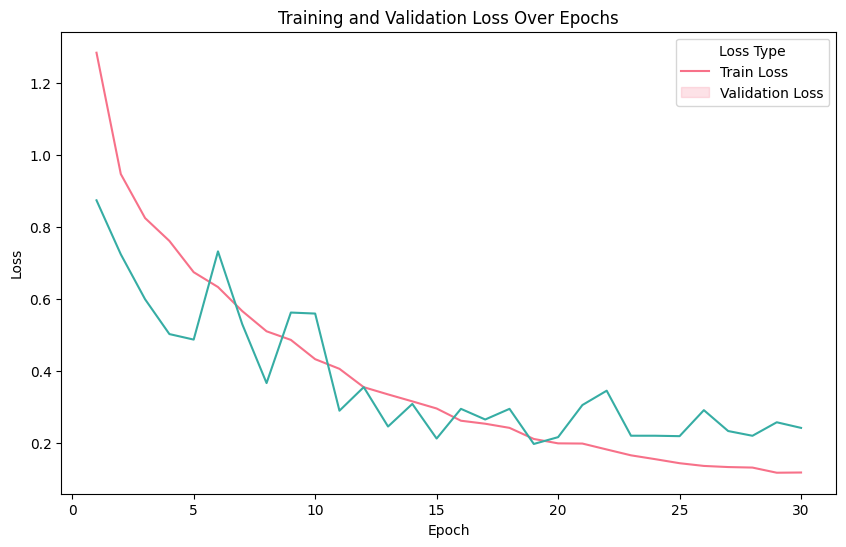

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the losses
plt.figure(figsize=(10, 6))
sns.lineplot(x='Epoch', y='value', hue='variable',
             data=pd.melt(loss_data, ['Epoch']), palette="husl")

# Customize the plot
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(title='Loss Type', labels=['Train Loss', 'Validation Loss'])
plt.show()

In [17]:
def calculate_accuracy(loader):
    model.eval()  # Set model to evaluation mode
    correct = 0 # Number of correct samples
    total = 0 # Number of total samples

    with torch.no_grad(): # Disables gradient
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)  # Get predicted class
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  # Count correct predictions

    return 100 * correct / total

# Calculate accuracy for validation and test sets
val_accuracy = calculate_accuracy(val_loader)  # Validation DataLoader
test_accuracy = calculate_accuracy(test_loader)  # Test DataLoader

print(f"Validation Accuracy: {val_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Validation Accuracy: 92.98%
Test Accuracy: 93.70%


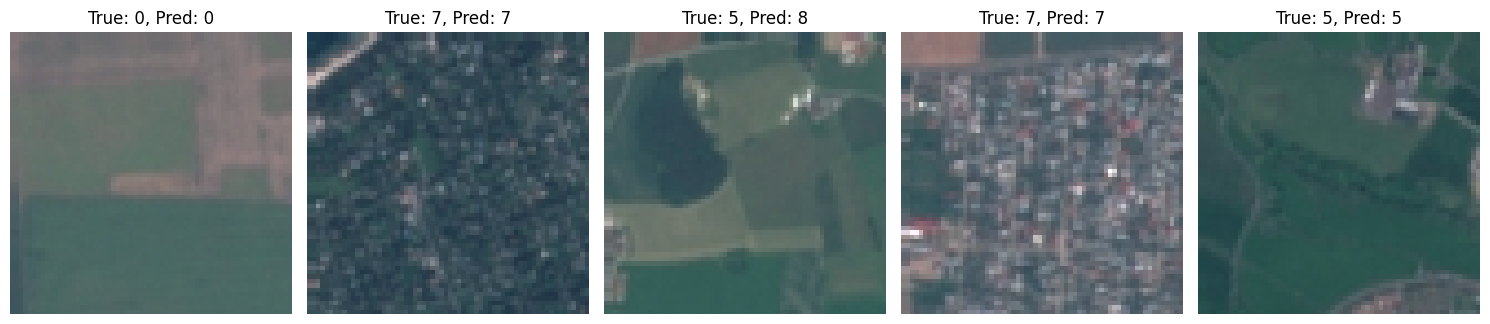

In [18]:
import matplotlib.pyplot as plt

# Function to visualize predictions on test data
def visualize_predictions(model, test_loader, num_samples=5):
    model.eval()  # Set model to evaluation mode
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Get a batch of test data
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)

    # Get model predictions
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Predicted class indices

    # Plot the specified number of samples
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        img = images[i].cpu().numpy().transpose(1, 2, 0)  # Convert tensor to image format (HWC)
        img = (img * 0.5 + 0.5)  # Undo normalization for visualization

        plt.imshow(img)
        plt.title(f"True: {labels[i].item()}, Pred: {predicted[i].item()}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to visualize predictions
visualize_predictions(model, test_loader, num_samples=5)